In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
pd.options.display.max_seq_items = 500
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [ ]:
breastcancer = pd.read_csv('data.csv') 
breastcancer.drop('id', axis=1, inplace=True)

In [ ]:
X_df = breastcancer.drop(['diagnosis'], axis=1)
X = np.array(X_df)
y = breastcancer['diagnosis']
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=0)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size=(1500/8500), random_state=0)

In [ ]:
model = LogisticRegression(C=3000)
model.fit(X_train, y_train)

LogisticRegression(C=3000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
y_actual = y_validation
y_pred = model.predict(X_validation)
print(confusion_matrix(y_actual, y_pred))

[[57  3]
 [ 1 40]]


In [ ]:
print(classification_report(y_actual, y_pred))

             precision    recall  f1-score   support

          B       0.98      0.95      0.97        60
          M       0.93      0.98      0.95        41

avg / total       0.96      0.96      0.96       101



In [ ]:
y_actual = y_test
y_pred = model.predict(X_test)
print(confusion_matrix(y_actual, y_pred))

[[48  2]
 [ 1 35]]


In [ ]:
print(classification_report(y_actual, y_pred))

             precision    recall  f1-score   support

          B       0.98      0.96      0.97        50
          M       0.95      0.97      0.96        36

avg / total       0.97      0.97      0.97        86



In [ ]:
model.coef_[0]

array([ -3.43800247e+00,  -1.00983575e-01,   2.37609478e-01,
         1.05111984e-02,   5.53385662e+00,  -1.52886856e+00,
         3.65899502e+00,   9.64631848e+00,   8.76612590e+00,
        -1.40000712e+00,  -1.75489533e+00,  -1.96144795e+00,
         4.25188099e-01,   1.39058851e-01,   8.00936112e-01,
        -9.60065625e+00,  -1.16486887e+01,   6.46873490e-01,
        -2.00314499e+00,  -1.87568148e+00,  -1.99705144e-01,
         4.44935270e-01,  -2.18627843e-02,   1.97925442e-02,
         9.42166139e+00,  -2.47927317e+00,   5.39116778e+00,
         1.89430794e+01,   7.94012674e+00,  -1.03412482e+00])

In [ ]:
X_df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
features_coef = list(zip(model.coef_[0],X_df.columns))

In [ ]:
feature_importances = sorted(features_coef, key=lambda pair:abs(pair[0]))[15:]

In [ ]:
feature_importances

[(-1.8756814752903279, 'fractal_dimension_se'),
 (-1.961447952275813, 'texture_se'),
 (-2.0031449942048734, 'symmetry_se'),
 (-2.4792731689191161, 'compactness_worst'),
 (-3.4380024713419282, 'radius_mean'),
 (3.6589950176741084, 'concavity_mean'),
 (5.3911677758952239, 'concavity_worst'),
 (5.5338566164554628, 'smoothness_mean'),
 (7.9401267417792836, 'symmetry_worst'),
 (8.7661259001417875, 'symmetry_mean'),
 (9.4216613911201197, 'smoothness_worst'),
 (-9.6006562454807014, 'compactness_se'),
 (9.6463184823734771, 'concave_points_mean'),
 (-11.648688652441946, 'concavity_se'),
 (18.943079412536246, 'concave_points_worst')]

In [ ]:
feature_importances_df = pd.DataFrame(feature_importances, columns=["a", "b"])
feature_importances_df

,a,b
0,-1.875681,fractal_dimension_se
1,-1.961448,texture_se
2,-2.003145,symmetry_se
3,-2.479273,compactness_worst
4,-3.438002,radius_mean
5,3.658995,concavity_mean
6,5.391168,concavity_worst
7,5.533857,smoothness_mean
8,7.940127,symmetry_worst
9,8.766126,symmetry_mean


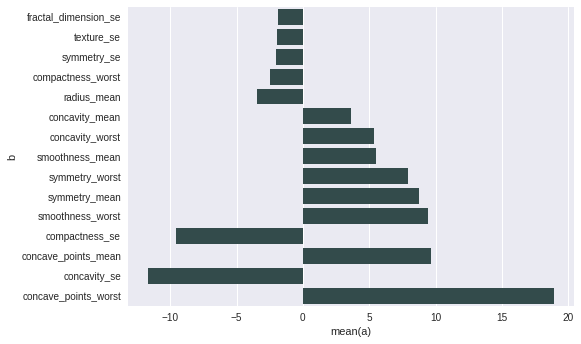

In [ ]:
sns.barplot(x='a', y='b', data=feature_importances_df, palette = ['darkslategrey'])

sns.plt.show()